# Vgg 16 fine Tuning ("Corn Diseases Detection Dataset")

## Imports & Data Loading

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

Data Loading from kaggle

In [2]:
import kagglehub

# Dataset Classes
###['Healthy', 'Common_Rust', 'Blight', 'Gray_Leaf_Spot']###

# Download latest version
data_dir = kagglehub.dataset_download("smaranjitghose/corn-or-maize-leaf-disease-dataset")

print("Path to dataset files:", data_dir)

100%|██████████| 161M/161M [00:08<00:00, 19.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/smaranjitghose/corn-or-maize-leaf-disease-dataset/versions/1


In [3]:
# Verify and access class directories
sub_dirs = []
if os.path.isdir(data_dir):
    sub_dirs = [os.path.join(data_dir, sub_dir) for sub_dir in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, sub_dir))]
    print("Subdirectories inside dataset:", sub_dirs)

    for sub_dir in sub_dirs:
        files = os.listdir(sub_dir)
        print(f"Files in '{sub_dir}':", files[:4])  # Print first 4 files

Subdirectories inside dataset: ['/root/.cache/kagglehub/datasets/smaranjitghose/corn-or-maize-leaf-disease-dataset/versions/1/data']
Files in '/root/.cache/kagglehub/datasets/smaranjitghose/corn-or-maize-leaf-disease-dataset/versions/1/data': ['Healthy', 'Common_Rust', 'Blight', 'Gray_Leaf_Spot']


## Data Preprocessing

In [4]:
# Use sub_dir as the training directory
train_data_dir = sub_dirs[0] if sub_dirs else data_dir  # Default to data_dir if no sub_dirs found

# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 3352 images belonging to 4 classes.
Found 836 images belonging to 4 classes.


## Model Loading & Adding Custom Layers (Fine Tuning 1)

In [5]:
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [6]:
# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False


In [7]:
# Add custom layers
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4, activation='softmax')(x)  # 4 classes

model = Model(inputs=base_model.input, outputs=x)


In [8]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)


0 input_layer False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False
19 flatten True
20 dense True
21 dropout True
22 dense_1 True


In [9]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

### Training the model

In [10]:
epochs = 10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 92s 728ms/step - accuracy: 0.6465 - loss: 0.8996 - val_accuracy: 0.8469 - val_loss: 0.3758
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 59s 561ms/step - accuracy: 0.8392 - loss: 0.4347 - val_accuracy: 0.8397 - val_loss: 0.4072
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 58s 549ms/step - accuracy: 0.8559 - loss: 0.3909 - val_accuracy: 0.8684 - val_loss: 0.3220
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 91s 639ms/step - accuracy: 0.8503 - loss: 0.3633 - val_accuracy: 0.8744 - val_loss: 0.2885
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 60s 569ms/step - accuracy: 0.8609 - loss: 0.3474 - val_accuracy: 0.9103 - val_loss: 0.2562
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 58s 550ms/step - accuracy: 0.8720 - loss: 0.3252 - val_accuracy: 0.8995 - val_loss: 0.2487
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 67s 642ms/step - accuracy: 0.8837 - loss: 0.2857 - val_accuracy: 0.8983 - val_loss: 0.2578
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 67s 640ms/step - accuracy: 0.8819 - loss: 0

### Model Evaluation

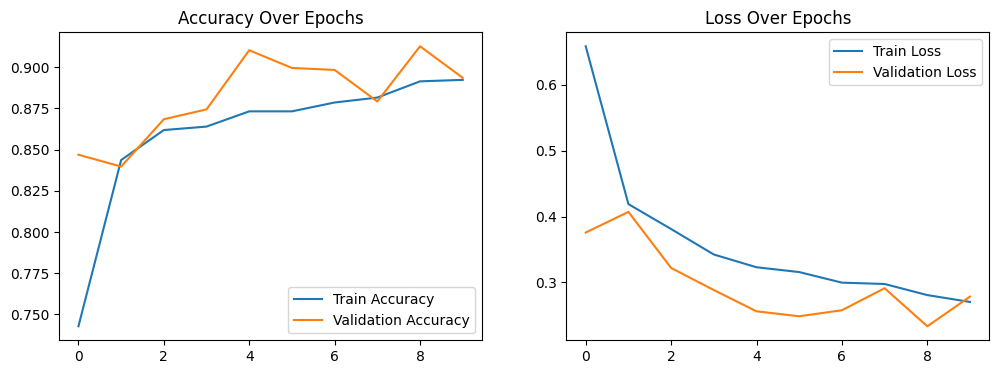

In [11]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Over Epochs")
plt.show()

In [12]:
# Evaluate on validation set
eval_results = model.evaluate(val_generator)
print(f"Validation Accuracy: {eval_results[1] * 100:.2f}%")

27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 437ms/step - accuracy: 0.8735 - loss: 0.2984
Validation Accuracy: 88.04%


## Fine Tuning 2 (Freezing first four convolutional blocks, unfreeze block 5 , with custom layers)

In [19]:
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze first four convolutional blocks, unfreeze block 5
for layer in base_model.layers:
    if any(x in layer.name for x in ["block1", "block2", "block3", "block4"]):
        layer.trainable = False
    else:
        layer.trainable = True

# Add custom layers
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(train_generator.num_classes, activation='softmax')(x)  # Number of classes dynamically detected

model = Model(inputs=base_model.input, outputs=x)


In [17]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

0 input_layer_2 True
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 flatten_2 True
20 dense_4 True
21 dropout_2 True
22 dense_5 True


In [20]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
epochs = 10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    verbose=1
)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 78s 685ms/step - accuracy: 0.6302 - loss: 0.9556 - val_accuracy: 0.8684 - val_loss: 0.3181
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 64s 613ms/step - accuracy: 0.8610 - loss: 0.3239 - val_accuracy: 0.9187 - val_loss: 0.2189
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 59s 567ms/step - accuracy: 0.8990 - loss: 0.2282 - val_accuracy: 0.9079 - val_loss: 0.2491
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 58s 554ms/step - accuracy: 0.9152 - loss: 0.1967 - val_accuracy: 0.9426 - val_loss: 0.1833
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 82s 557ms/step - accuracy: 0.9206 - loss: 0.1938 - val_accuracy: 0.9187 - val_loss: 0.2512
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 59s 561ms/step - accuracy: 0.9317 - loss: 0.1706 - val_accuracy: 0.9390 - val_loss: 0.1635
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 60s 569ms/step - accuracy: 0.9413 - loss: 0.1570 - val_accuracy: 0.9306 - val_loss: 0.1631
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 59s 564ms/step - accuracy: 0.9391 - loss: 0

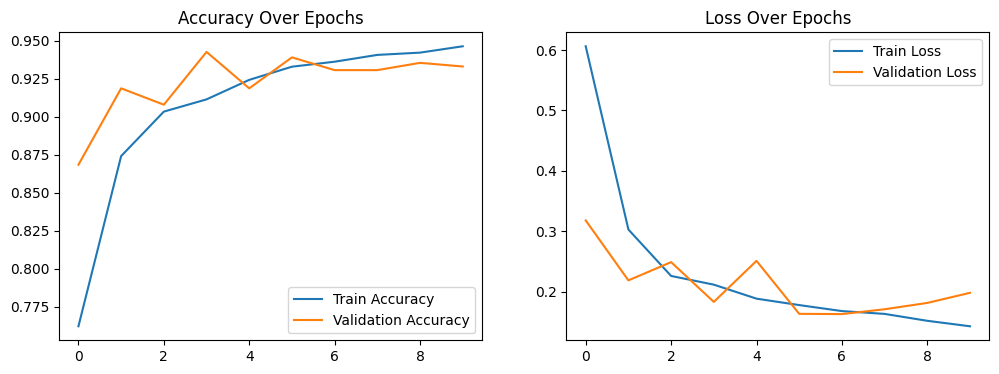

27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 413ms/step - accuracy: 0.9301 - loss: 0.1880
Validation Accuracy: 93.42%


In [21]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Over Epochs")
plt.show()

# Evaluate on validation set
eval_results = model.evaluate(val_generator)
print(f"Validation Accuracy: {eval_results[1] * 100:.2f}%")

Thank You......
